In [1]:
import os
import sys
import sqlite3
import numpy as np
import pandas as pd
import geopandas as gp
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scs

In [2]:
sys.path.append('/home/pooya/w/DroughtMonitoringIran/')

DATABASE_PATH = "./database/database.db"

### Monthly Data

In [3]:
conn = sqlite3.connect(DATABASE_PATH)

data = pd.read_sql(sql='SELECT * FROM data', con=conn)

conn.close()

In [4]:
# w1, w2, w3 = 0.4, 0.4, 0.2  # Adjust these weights as needed
# # Calculate Composite Index (CI)
# data['CI'] = w1 * data['VCI'] + w2 * data['TCI'] + w3 * data['PCI']


In [ ]:
data.columns

Index(['Station_ID', 'Station_Name', 'Province', 'Station_Latitude',
       'Station_Longitude', 'Station_Elevation', 'Date', 'Temp_Max',
       'Temp_Min', 'Temp_Mean', 'Wind_Speed', 'Pressure', 'Humidity_Max',
       'Humidity_Min', 'Humidity', 'Sunshine', 'Precip', 'PET_Hargreaves',
       'SPI_1', 'SPEI_1', 'SPI_3', 'SPEI_3', 'SPI_6', 'SPEI_6', 'SPI_9',
       'SPEI_9', 'SPI_12', 'SPEI_12', 'SPI_15', 'SPEI_15', 'SPI_18', 'SPEI_18',
       'SPI_21', 'SPEI_21', 'SPI_24', 'SPEI_24', 'ERA5_Precip', 'GPM_Precip',
       'TRMM_Precip', 'TerraClimate_Precip', 'PERSIANNCDR_Precip',
       'CHIRPS_Precip', 'PCI_ERA5', 'PCI_GPM', 'PCI_TRMM', 'PCI_TerraClimate',
       'PCI_PERSIANNCDR', 'PCI_CHIRPS', 'NDVI_MOD13A3', 'NDVI_MYD13A3',
       'EVI_MOD13A3', 'EVI_MYD13A3', 'NDVI', 'EVI', 'VCI', 'VHIDay',
       'VHINight', 'VHI', 'LSTDay_MOD21C3', 'LSTDay_MYD21C3',
       'LSTNight_MOD21C3', 'LSTNight_MYD21C3', 'LSTDay', 'LSTNight', 'LST',
       'TCIDay', 'TCINight', 'TCI', 'PET_MOD16A2GF'],
   

In [13]:
from utils.model_evaluator import ModelEvaluator

for sid, df in data.groupby(by='Station_ID'):
    print(f"\nMetrics for Station ID: {sid}")
    ModelEvaluator(df, 'Precip', 'TerraClimate_Precip').display_metrics()


Metrics for Station ID: 40709
Model Performance Metrics:
Mean Absolute Error (MAE): 54.4207
Mean Squared Error (MSE): 7121.4215
Root Mean Squared Error (RMSE): 84.3885
R-squared (R2): 0.3364
Explained Variance Score: 0.5160
Willmott's Index of Agreement (WI): 0.6111
Nash–Sutcliffe Efficiency (NS): 0.3364
Mean Absolute Deviation (MAD): 54.4207

Metrics for Station ID: 40718
Model Performance Metrics:
Mean Absolute Error (MAE): 75.4828
Mean Squared Error (MSE): 13231.2570
Root Mean Squared Error (RMSE): 115.0272
R-squared (R2): 0.2538
Explained Variance Score: 0.5215
Willmott's Index of Agreement (WI): 0.6047
Nash–Sutcliffe Efficiency (NS): 0.2538
Mean Absolute Deviation (MAD): 75.4828

Metrics for Station ID: 40719
Model Performance Metrics:
Mean Absolute Error (MAE): 38.0995
Mean Squared Error (MSE): 3192.3956
Root Mean Squared Error (RMSE): 56.5013
R-squared (R2): 0.5711
Explained Variance Score: 0.6259
Willmott's Index of Agreement (WI): 0.7163
Nash–Sutcliffe Efficiency (NS): 0.5711

In [25]:
df = data[[
    'Station_ID', 'Date', 'SPI_9', 'SPEI_9',
    'PCI_ERA5', 'PCI_GPM', 
    'NDVI', 'EVI', 'VCI', 'VHI', 'LST', 'TCI'
]]
df

,Station_ID,Date,SPI_9,SPEI_9,PCI_ERA5,PCI_GPM,NDVI,EVI,VCI,VHI,LST,TCI
0,40709,2006-01,NaN,NaN,0.999546,0.513393,0.43,0.18,0.55,0.52,6.01,0.49
1,40709,2006-02,NaN,NaN,0.255625,0.168605,0.42,0.17,0.64,0.72,6.78,0.80
2,40709,2006-03,NaN,NaN,0.117999,0.163551,0.40,0.18,0.36,0.48,10.94,0.60
3,40709,2006-04,NaN,NaN,0.287615,0.588235,0.45,0.19,0.48,0.50,14.53,0.51
4,40709,2006-05,NaN,NaN,0.033112,0.020408,0.54,0.26,0.48,0.55,20.35,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...
5545,99361,2024-02,0.322641,-0.123471,0.556373,0.747826,0.33,0.15,0.91,0.70,3.83,0.48
5546,99361,2024-03,-0.220952,-0.932412,0.196195,0.000000,0.32,0.16,0.37,0.45,7.94,0.53
5547,99361,2024-04,-0.061764,-0.765620,0.268019,0.367187,0.56,0.38,0.86,0.60,14.80,0.35
5548,99361,2024-05,-0.082741,-0.402092,0.824986,0.847458,0.58,0.41,0.74,0.70,18.17,0.67


In [26]:
correlation_matrices = {}

# Group by Station_ID and calculate correlation matrices
for station, group in df.drop(columns=["Date"]).groupby("Station_ID"):
    # Calculate the correlation matrix for this station
    corr_matrix = group.corr()
    correlation_matrices[station] = corr_matrix

# Example: Access the correlation matrix for Station 1
print("Correlation matrix for Station 1:")
print(correlation_matrices['40709'])


Correlation matrix for Station 1:
            Station_ID     SPI_9    SPEI_9  PCI_ERA5   PCI_GPM      NDVI  \
Station_ID         NaN       NaN       NaN       NaN       NaN       NaN   
SPI_9              NaN  1.000000  0.986259  0.164860  0.260504 -0.029688   
SPEI_9             NaN  0.986259  1.000000  0.174531  0.258379 -0.034034   
PCI_ERA5           NaN  0.164860  0.174531  1.000000  0.766468  0.025235   
PCI_GPM            NaN  0.260504  0.258379  0.766468  1.000000  0.060769   
NDVI               NaN -0.029688 -0.034034  0.025235  0.060769  1.000000   
EVI                NaN -0.085261 -0.082260 -0.058792 -0.022939  0.943843   
VCI                NaN -0.040630 -0.055859  0.248779  0.215452  0.493373   
VHI                NaN -0.067002 -0.050423  0.358466  0.335573  0.275594   
LST                NaN  0.010010  0.008123 -0.206791 -0.137589  0.795201   
TCI                NaN -0.060702 -0.018099  0.277240  0.278613 -0.112544   

                 EVI       VCI       VHI       LST   

40709


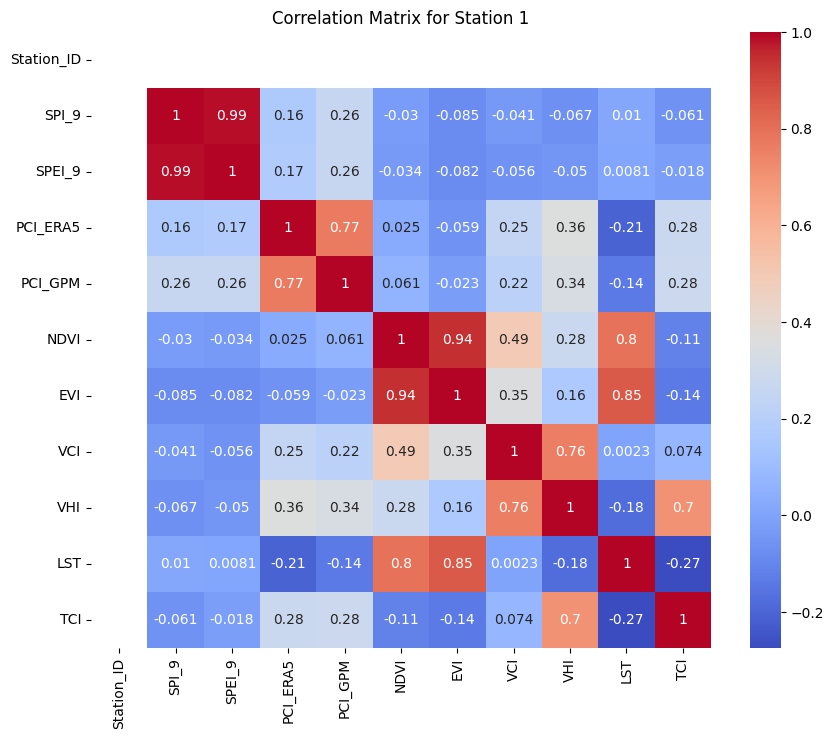

40718


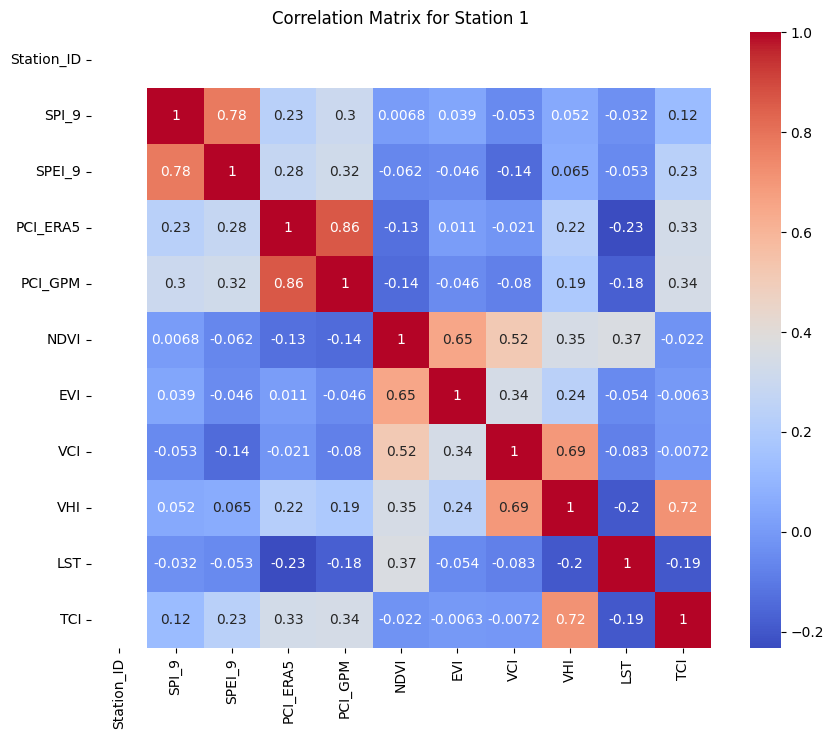

40719


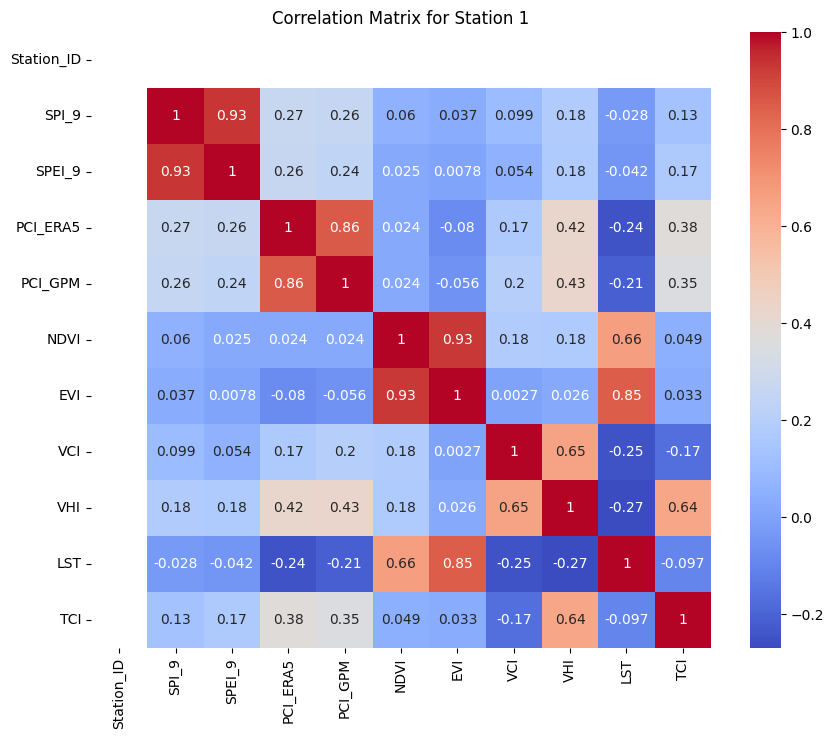

40720


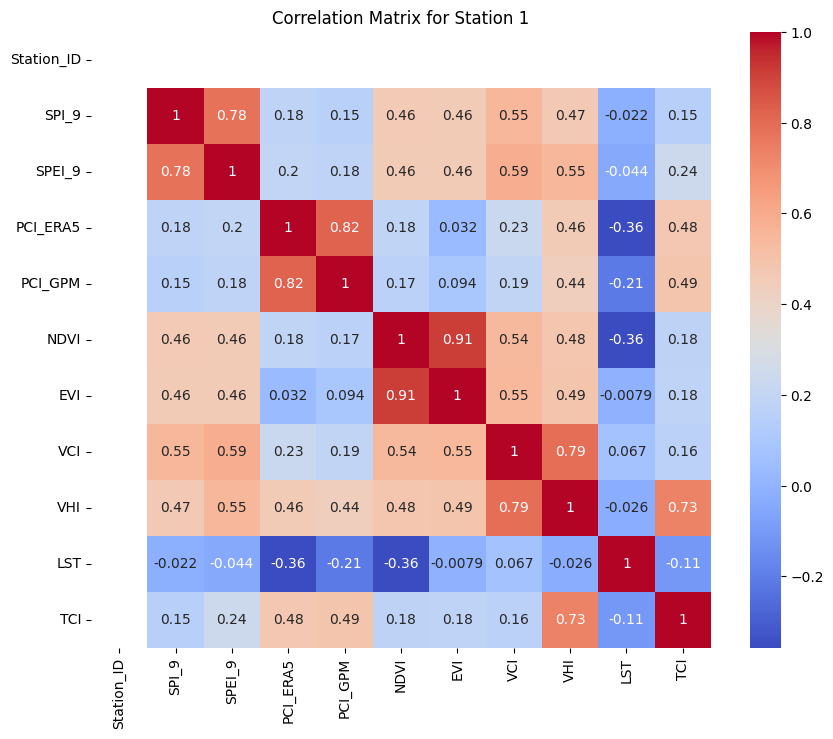

40732


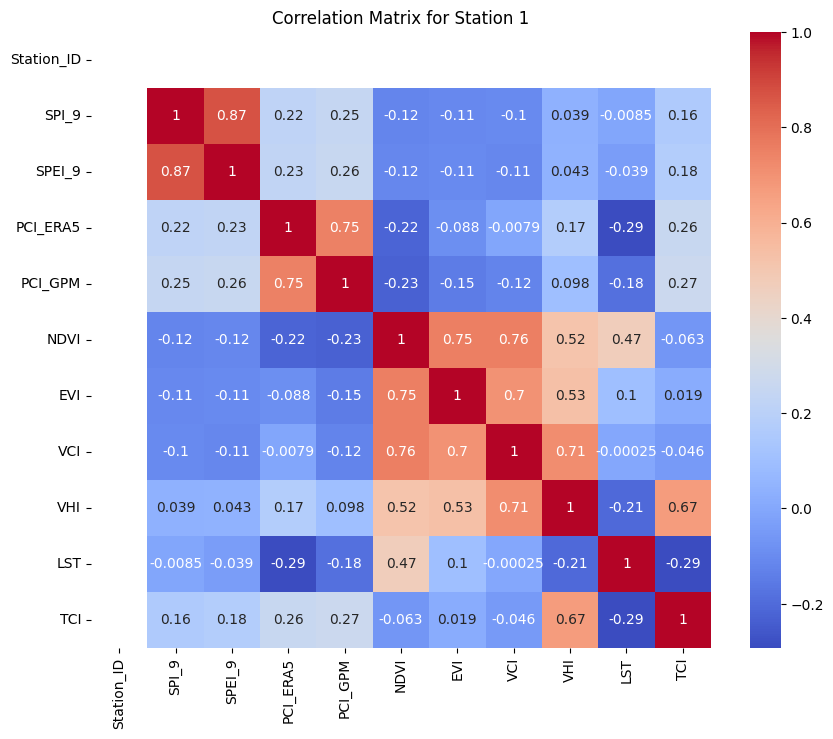

40734


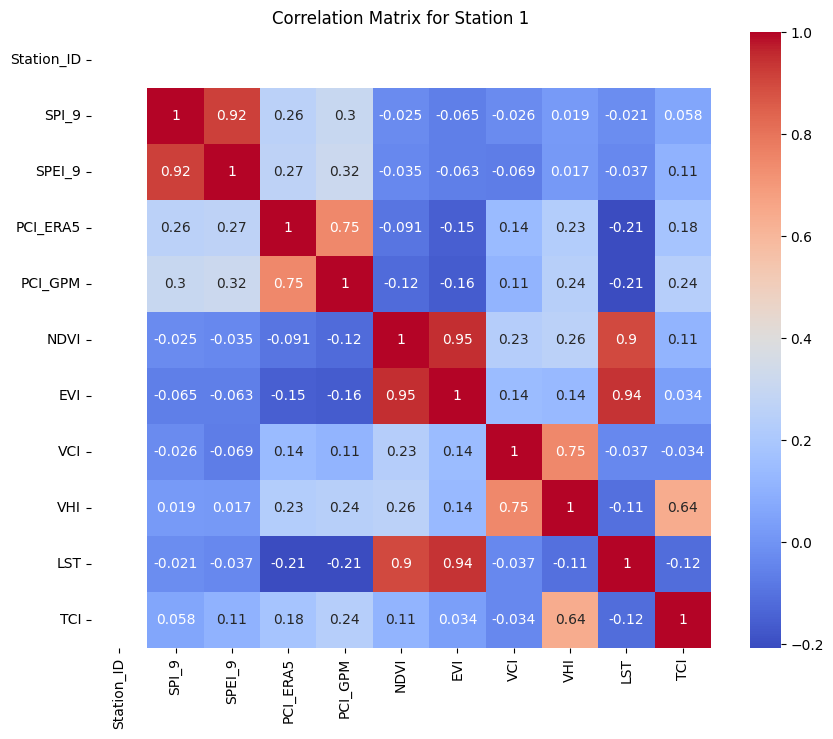

40735


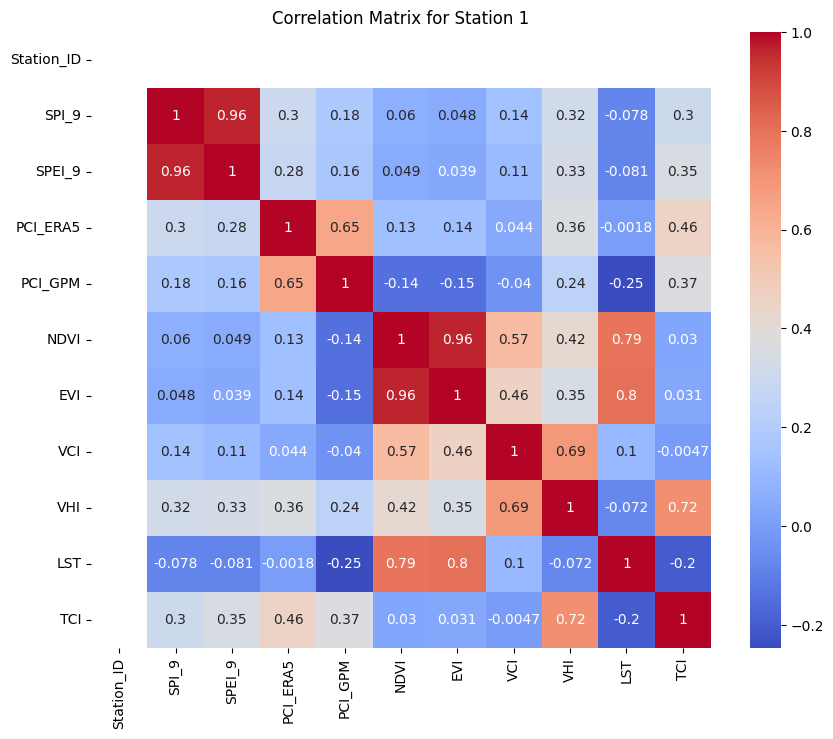

40736


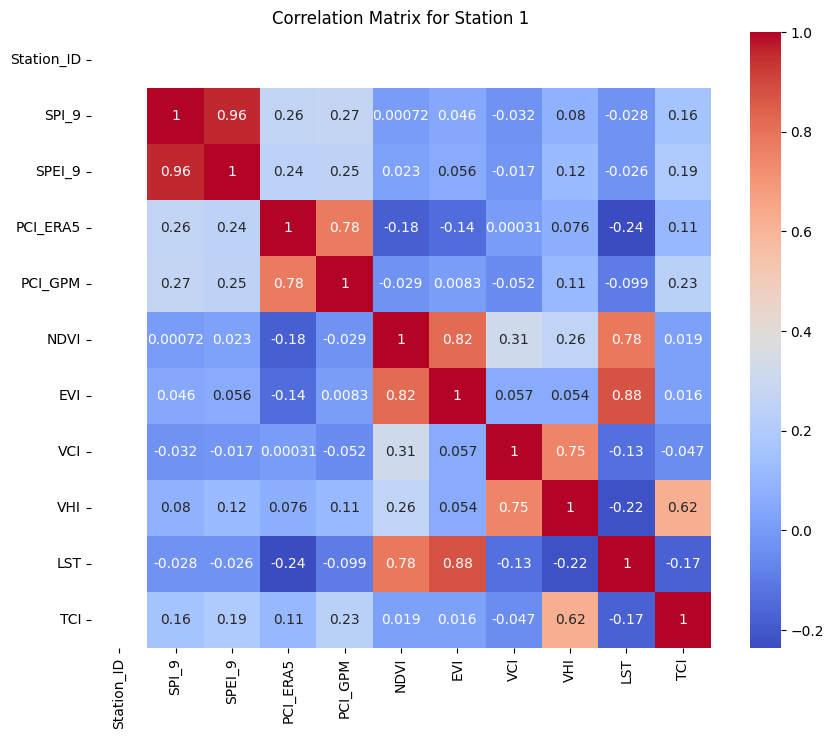

40737


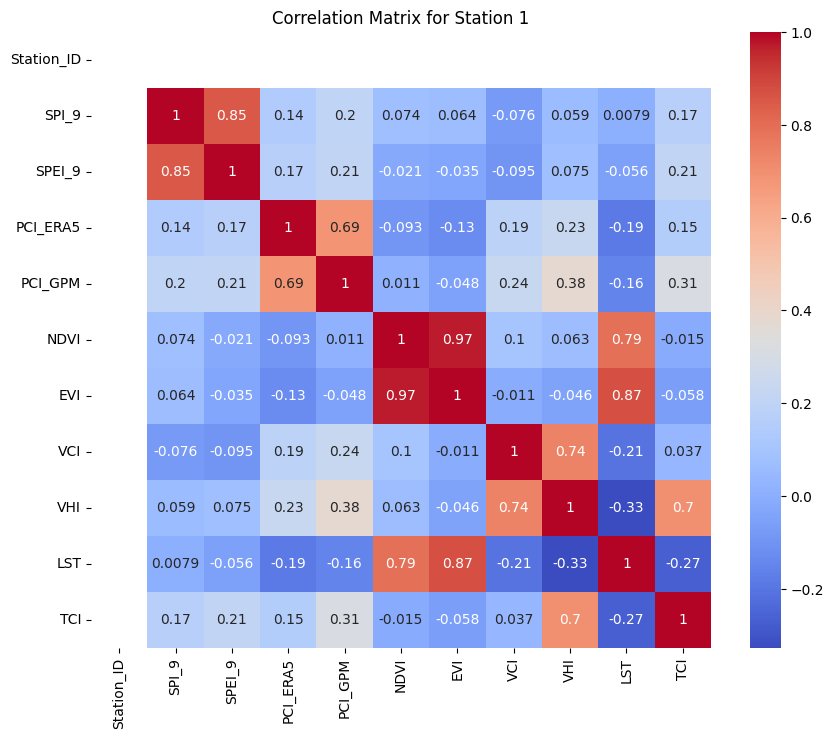

40759


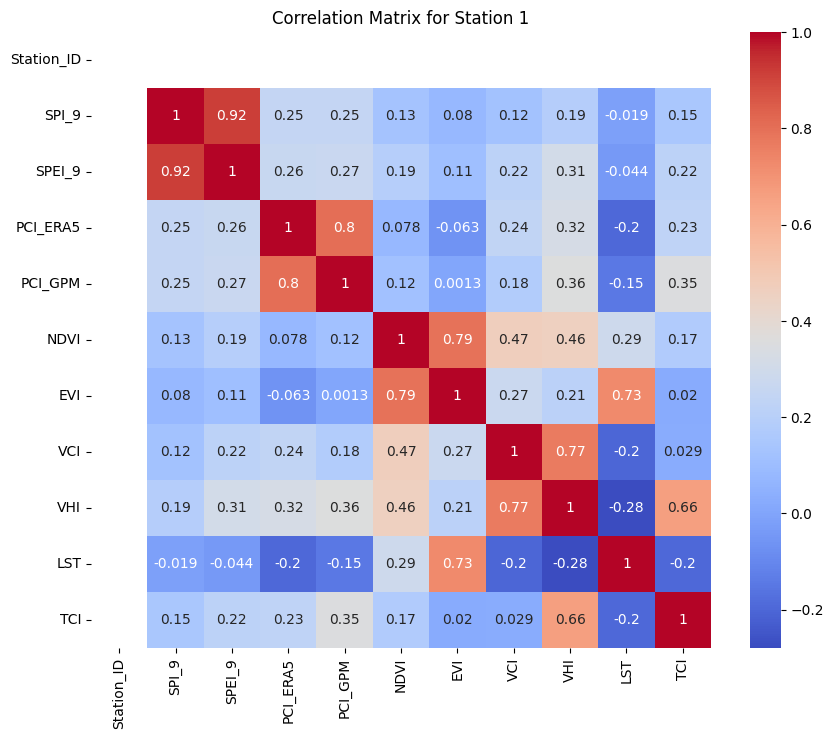

40760


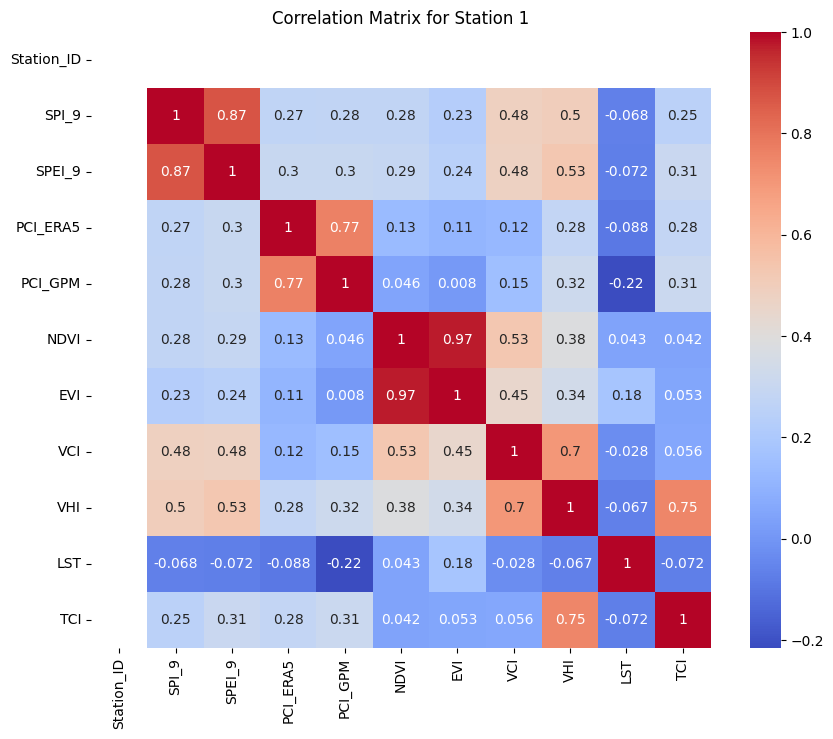

40788


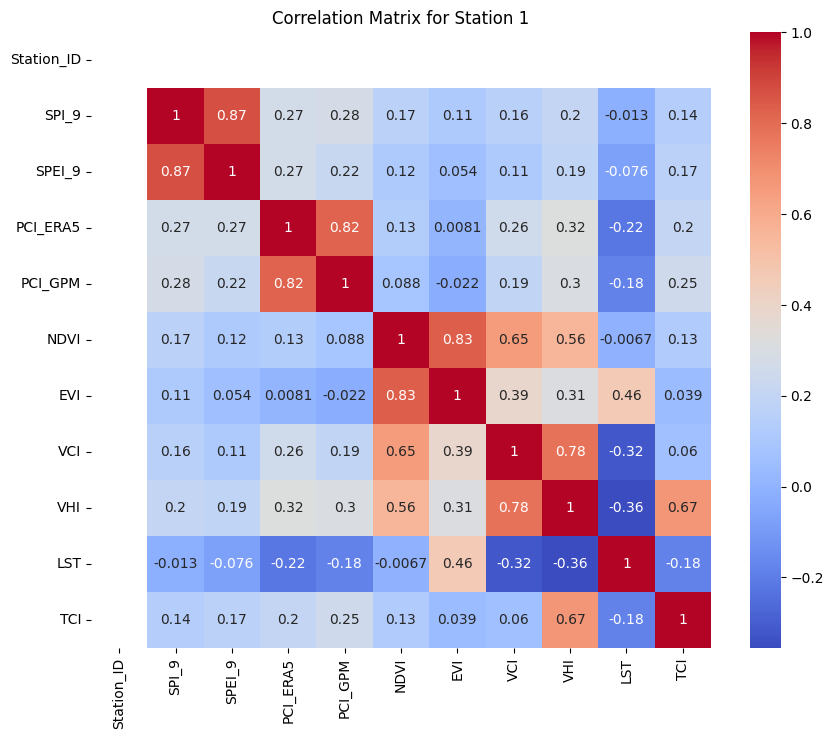

40805


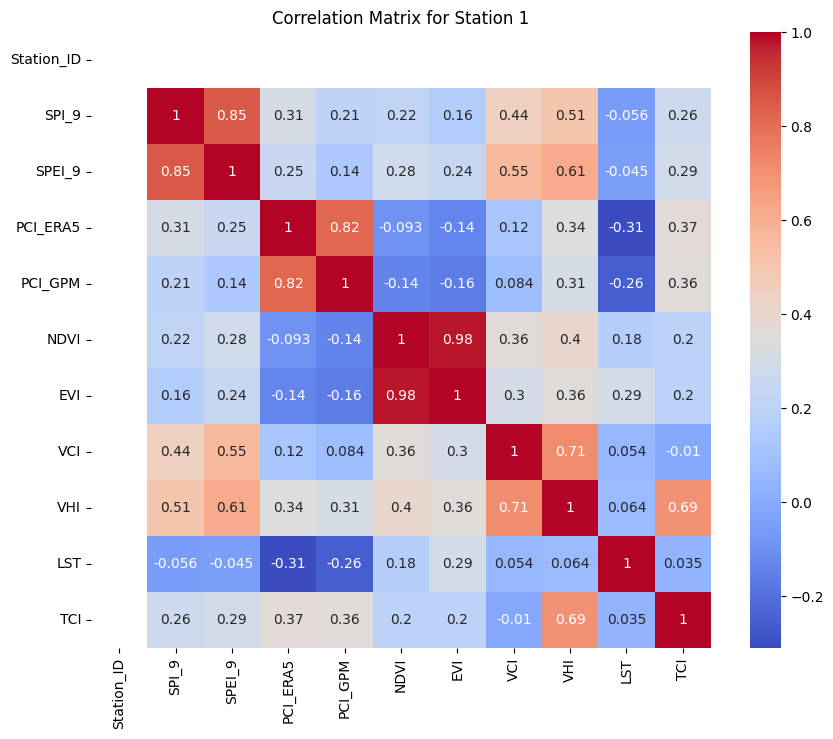

99249


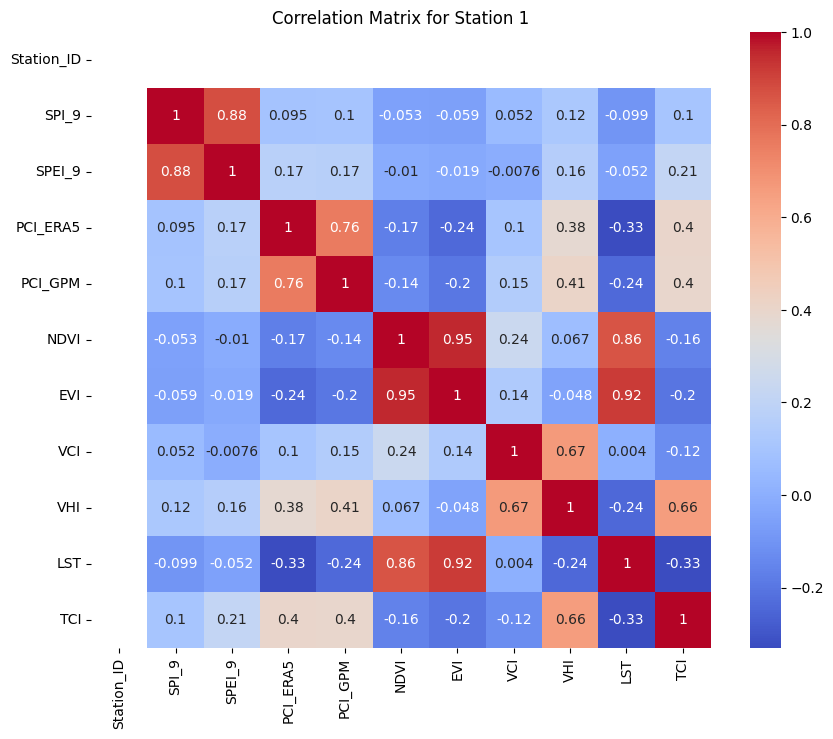

99268


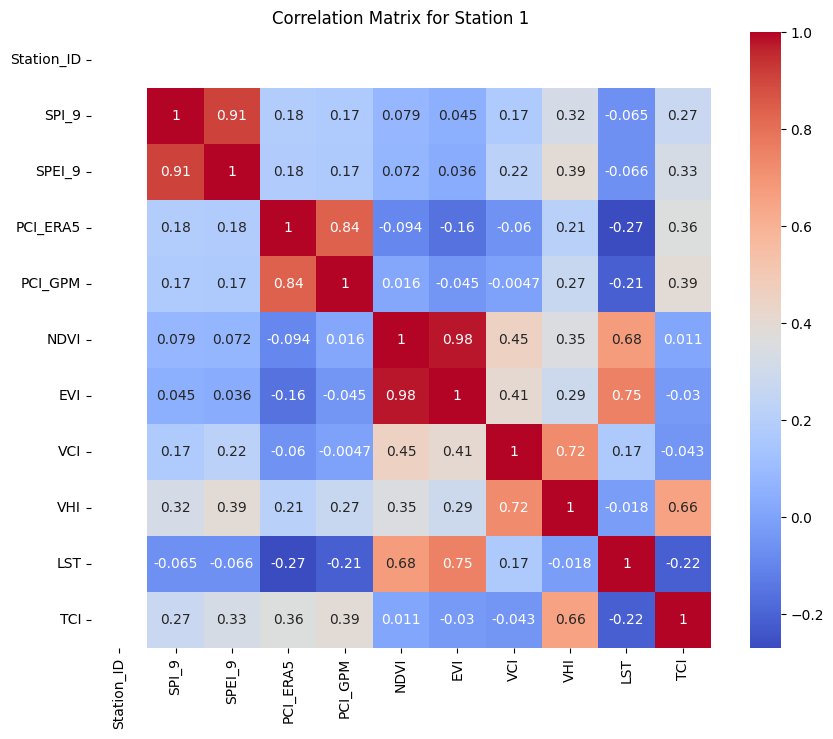

99272


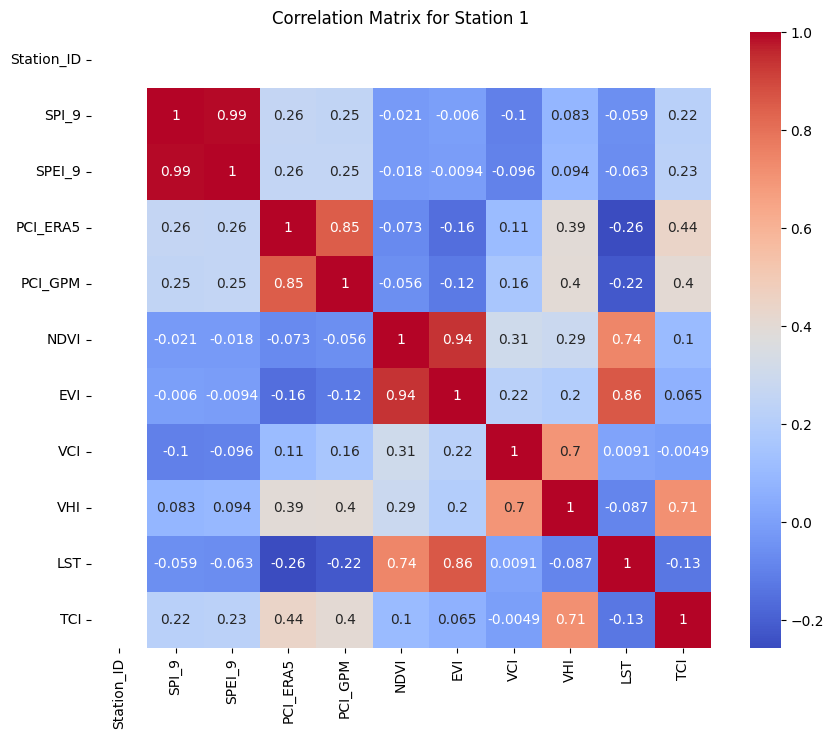

99276


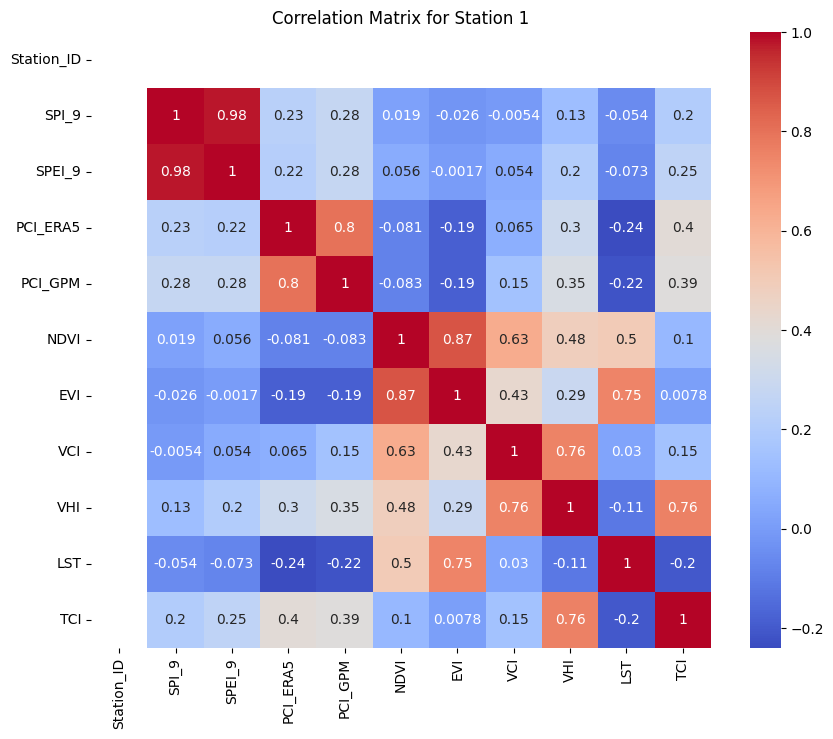

99281


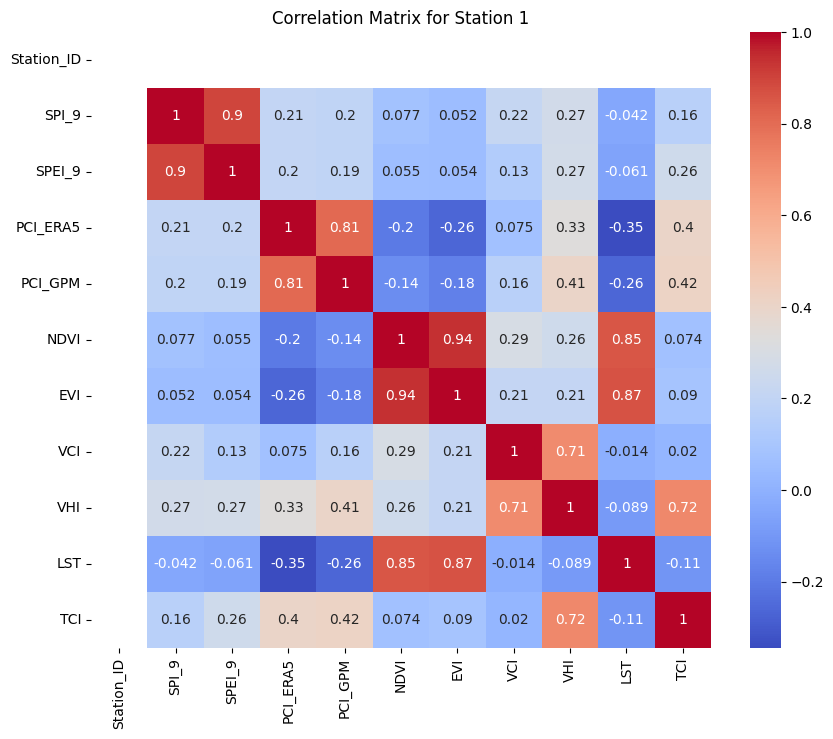

99299


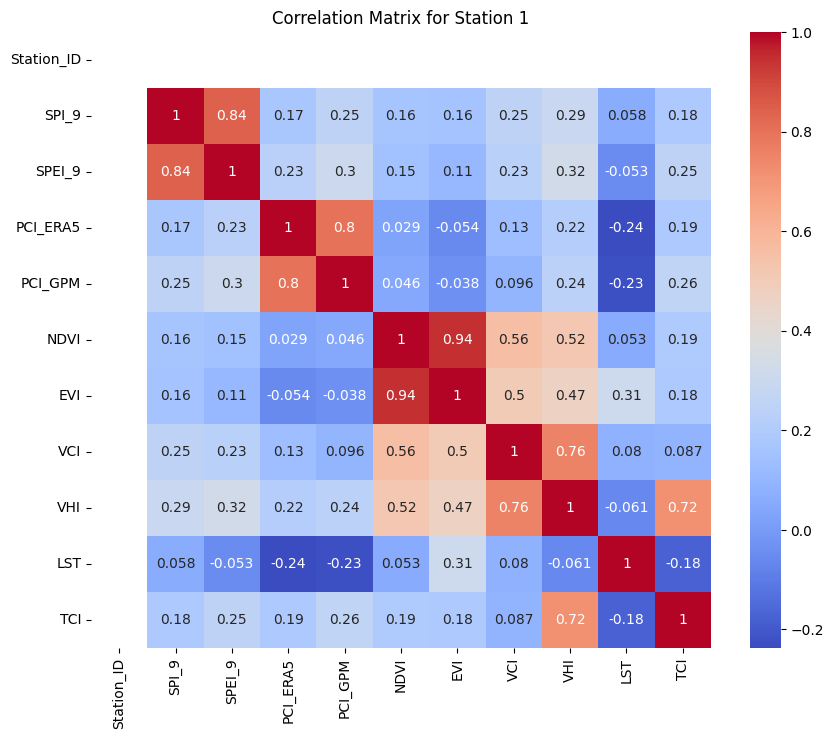

99306


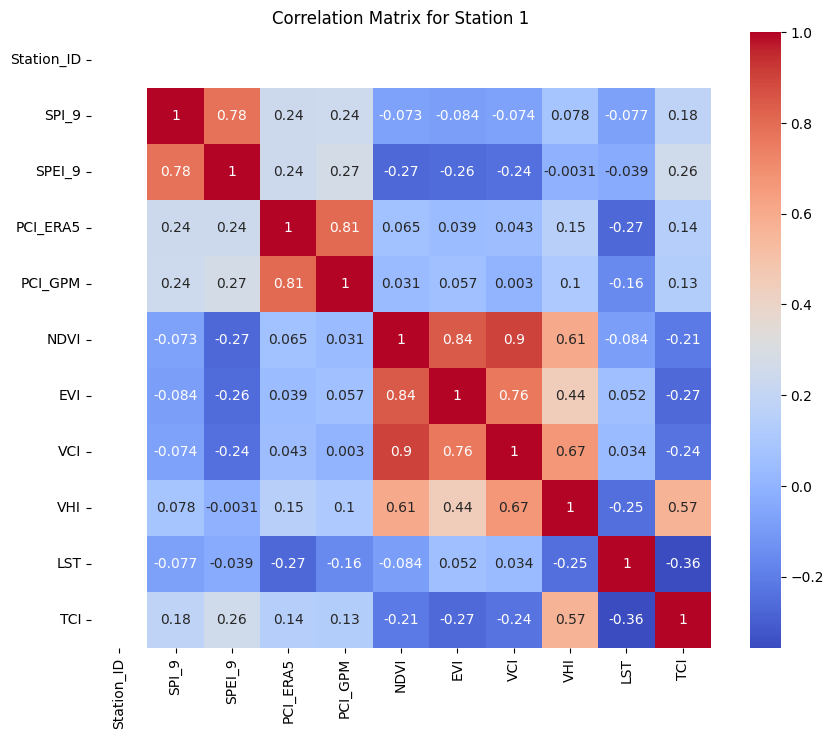

99309


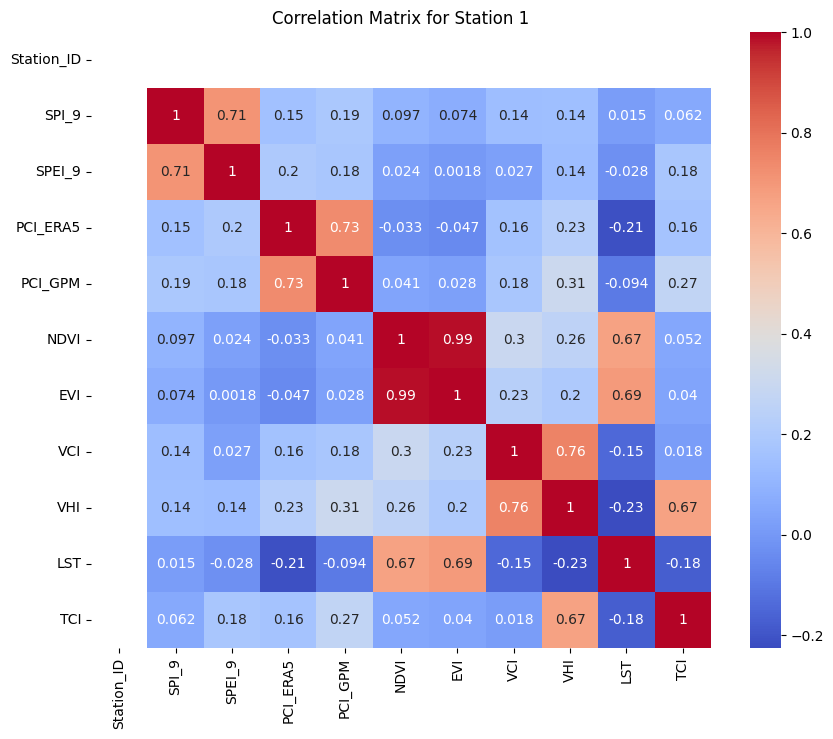

99348


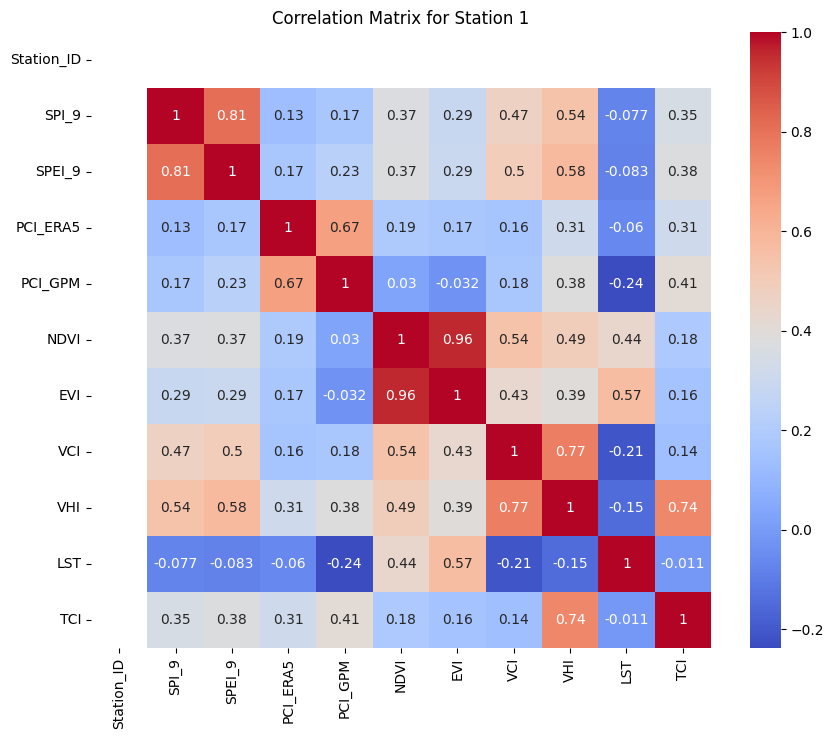

99357


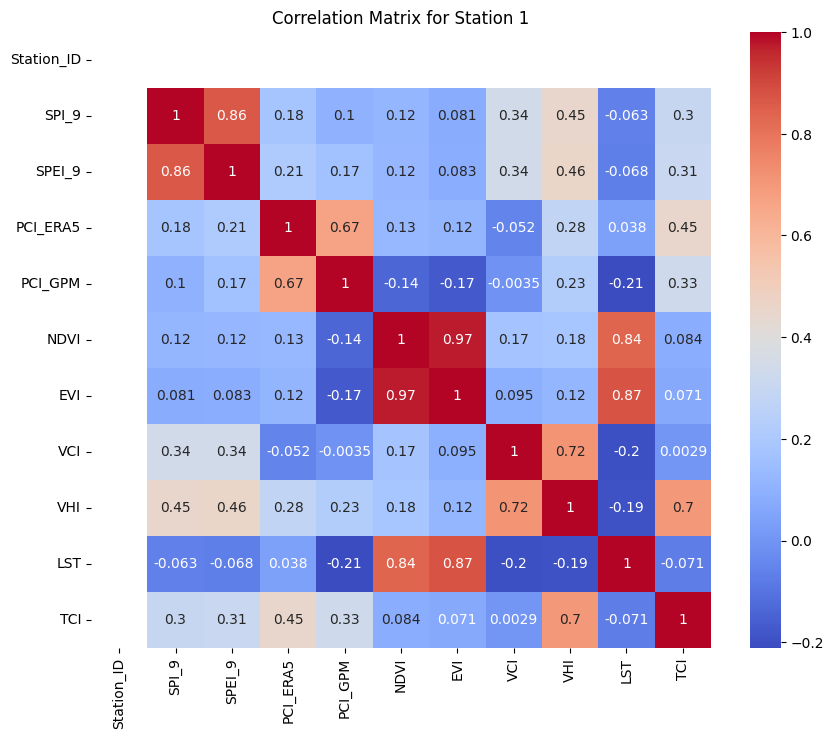

99360


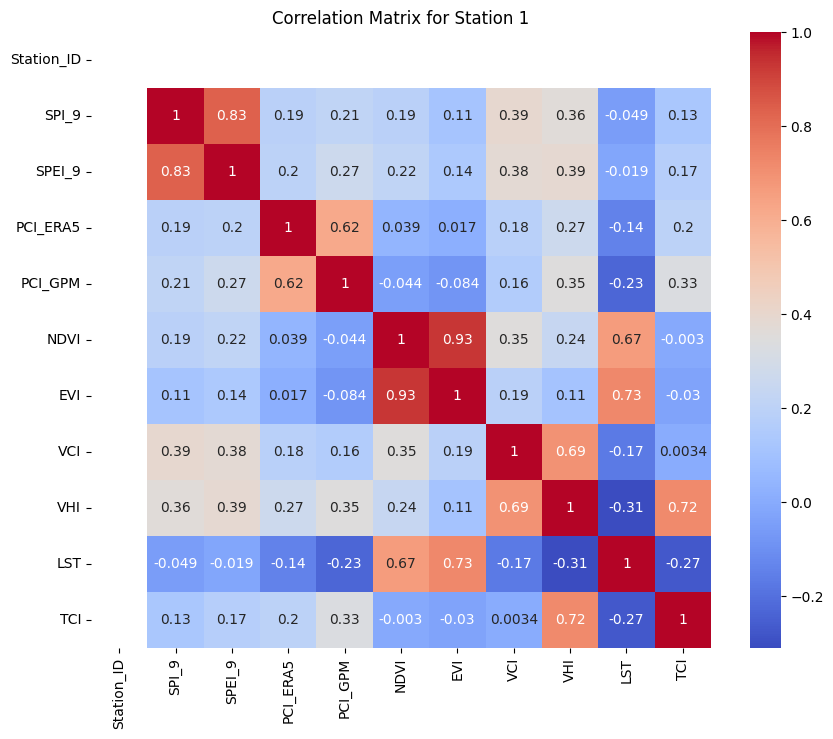

99361


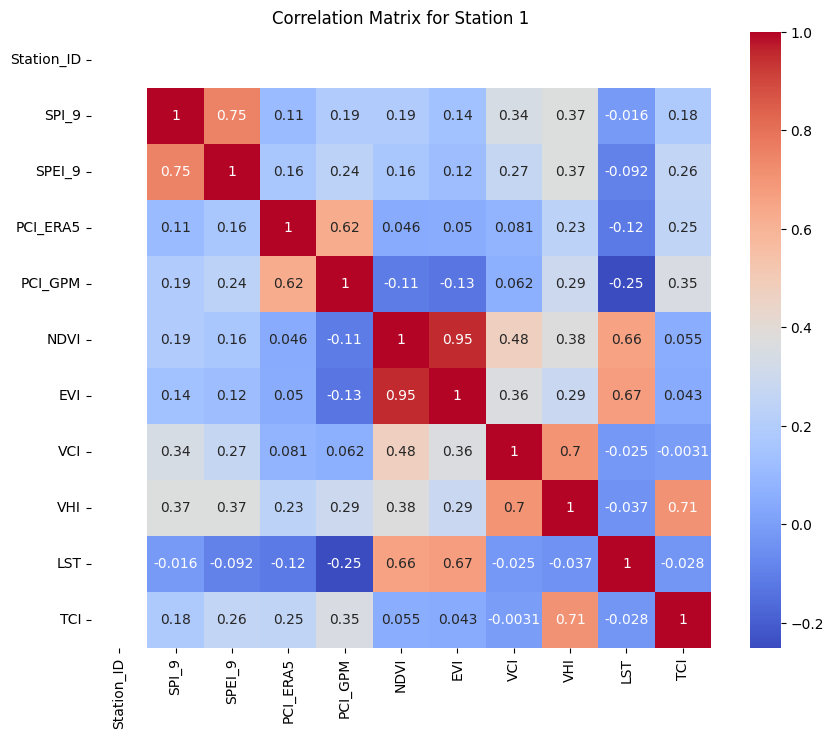

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for the overall correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrices, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix for All Data")
# plt.show()

# Example: Plot for Station 1
for i in df.Station_ID.unique():
    print(i)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrices[i], annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix for Station 1")
    plt.show()
